## Vizulaization

### Vizualizaitons of dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import os
import re
import nltk

In [4]:
import plotly.io as pio
pio.renderers.default = "browser"

In [5]:
# ========== LOAD DATA ==========
def load_data(csv_path: str) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    print(f"✅ Loaded {len(df)} records and {len(df.columns)} columns")
    return df

In [6]:

# ========== 1. Urgency Distribution ==========
def plot_urgency_distribution(df: pd.DataFrame):
    urgency_counts = df["urgency"].value_counts().reset_index()
    urgency_counts.columns = ["urgency", "count"]

    fig = px.bar(urgency_counts,
                x="urgency", y="count",
                color="urgency",
                title="Distribution of Urgency Levels",
                labels={"urgency": "Urgency Level", "count": "Count"})
    fig.show()


In [7]:
# ========== 2. Grievances per Department ==========
def plot_department_distribution(df: pd.DataFrame):
    dept_counts = df["department"].value_counts().reset_index()
    dept_counts.columns = ["department", "count"]

    fig = px.bar(dept_counts,
                 x="count", y="department",
                 orientation="h",
                 color="department",
                 title="Number of Grievances per Department")
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()

In [8]:
# ========== 3. Urgency by Department ==========
def plot_urgency_by_department(df: pd.DataFrame):
    grouped = df.groupby(["department", "urgency"]).size().reset_index(name="count")

    fig = px.bar(grouped, 
                 x="department", y="count", 
                 color="urgency",
                 barmode="group",
                 title="Urgency Distribution by Department")
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()

In [9]:
# ========== 4. Average Grievance Length ==========
def plot_grievance_length(df: pd.DataFrame):
    df["text_length"] = df["grievance"].astype(str).apply(len)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x="urgency", y="text_length", data=df, palette="Set2")
    plt.title("Grievance Text Length by Urgency Level")
    plt.xlabel("Urgency Level")
    plt.ylabel("Text Length (characters)")
    plt.tight_layout()
    plt.show()

In [10]:
import os

def load_stopwords(path):
    with open(path, "r", encoding="utf-8") as f:
        return set(line.strip() for line in f if line.strip())


In [11]:
# ========== 5. Word Cloud ==========
def plot_wordcloud(df: pd.DataFrame, urgency_level: str = None):

    font_path_nepali = "../assets/preeti.ttf" if os.path.exists("../assets/preeti.ttf") else None
    font_path_english = "../assets/JetBrainsMonoNLNerdFontMono-ExtraLightItalic.ttf" if os.path.exists("../assets/JetBrainsMonoNLNerdFontMono-ExtraLightItalic.ttf") else None

    if urgency_level:
        text = " ".join(df[df["urgency"] == urgency_level]["grievance"].dropna().astype(str))
        title = f"Word Cloud for {urgency_level} Grievances"
    else:
        text = " ".join(df["grievance"].dropna().astype(str))
        title = "Overall Word Cloud of Grievances"

    # --- Separate English and Nepali words using regex ---
    nepali_text = " ".join(re.findall(r"[\u0900-\u097F]+", text))   # Devanagari range
    english_text = " ".join(re.findall(r"[A-Za-z]+", text))         # English letters

    # --- Create word clouds ---
    wc_nepali = WordCloud(
        width=1000, height=600,
        background_color="white",
        font_path=font_path_nepali,
        collocations=False
    ).generate(nepali_text)

    wc_english = WordCloud(
        width=1000, height=600,
        background_color="white",
        font_path=font_path_english,
        collocations=False
    ).generate(english_text)

    # --- Plot side-by-side ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    axes[0].imshow(wc_nepali, interpolation="bilinear")
    axes[0].axis("off")
    axes[0].set_title(f"Nepali Word Cloud {title}", fontsize=14)

    axes[1].imshow(wc_english, interpolation="bilinear")
    axes[1].axis("off")
    axes[1].set_title(f"English Word Cloud {title}", fontsize=14)

    plt.tight_layout()
    plt.show()

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/nyanko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nyanko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def plot_wordcloud_separate(df: pd.DataFrame, urgency_level: str = None, max_words: int = 100):

    font_path_nepali = "../assets/fonts/Lohit-Nepali.ttf" if os.path.exists("../assets/fonts/Lohit-Nepali.ttf") else None
    font_path_english = "../assets/fonts/JetBrainsMonoNLNerdFontMono-ExtraLightItalic.ttf" if os.path.exists("../assets/fonts/JetBrainsMonoNLNerdFontMono-ExtraLightItalic.ttf") else None

    nepali_stopwords = load_stopwords("../assets/stopwords/nepali_stopwords.txt") if os.path.exists("../assets/stopwords/nepali_stopwords.txt") else set()

    # Filter by urgency if provided
    if urgency_level:
        text = " ".join(df[df["urgency"] == urgency_level]["grievance"].dropna().astype(str))
        title_suffix = f"({urgency_level} Grievances)"
    else:
        text = " ".join(df["grievance"].dropna().astype(str))
        title_suffix = "(All Grievances)"

    # --- Separate English and Nepali words ---
    nepali_words = re.findall(r"[\u0900-\u097F]+", text)
    english_words = re.findall(r"[A-Za-z]+", text)

    # --- Clean Nepali words ---

    # Optional: remove common stopwords (if you want, we can add that later)
    # nepali_words = [w for w in nepali_words if w not in nepali_stopwords]
    nepali_text = " ".join(nepali_words)
    english_text = " ".join(english_words)

    # --- Create word clouds ---
    if nepali_text.strip():
        wc_nepali = WordCloud(
            width=1000, height=600,
            background_color="white",
            font_path=font_path_nepali,
            collocations=False,
            stopwords=nepali_stopwords,
            max_words=max_words
        ).generate(nepali_text)
    else:
        wc_nepali = None

    if english_text.strip():
        wc_english = WordCloud(
            width=1000, height=600,
            background_color="white",
            font_path=font_path_english,
            collocations=False,
            max_words=max_words
        ).generate(english_text)
    else:
        wc_english = None

    # --- Plot ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    if wc_nepali:
        axes[0].imshow(wc_nepali, interpolation="bilinear")
        axes[0].set_title(f"Nepali Word Cloud {title_suffix}", fontsize=14)
    else:
        axes[0].text(0.5, 0.5, "No Nepali Text", ha="center", va="center", fontsize=12)
    axes[0].axis("off")

    if wc_english:
        axes[1].imshow(wc_english, interpolation="bilinear")
        axes[1].set_title(f"English Word Cloud {title_suffix}", fontsize=14)
    else:
        axes[1].text(0.5, 0.5, "No English Text", ha="center", va="center", fontsize=12)
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

In [14]:

# ========== 6. Run All Visualizations ==========
def run_eda_visualizations(csv_path: str):
    df = load_data(csv_path)
    plot_urgency_distribution(df)
    plot_department_distribution(df)
    plot_urgency_by_department(df)
    plot_grievance_length(df)
    plot_wordcloud_separate(df)
    for level in df["urgency"].unique():
        plot_wordcloud_separate(df, urgency_level=level)

✅ Loaded 6000 records and 4 columns
Opening in existing browser session.
Opening in existing browser session.
Opening in existing browser session.


/tmp/ipykernel_13292/2948492557.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




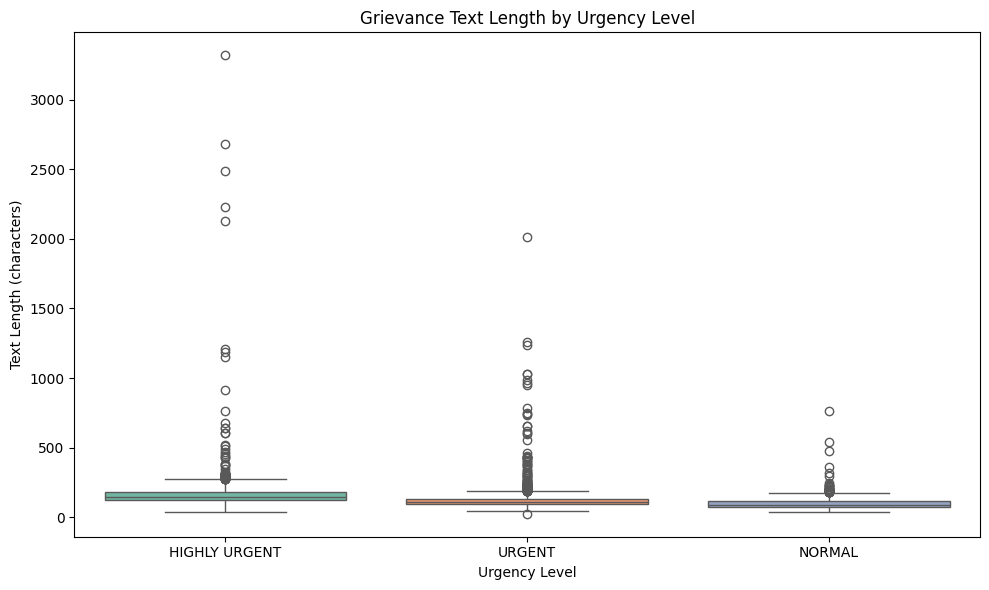

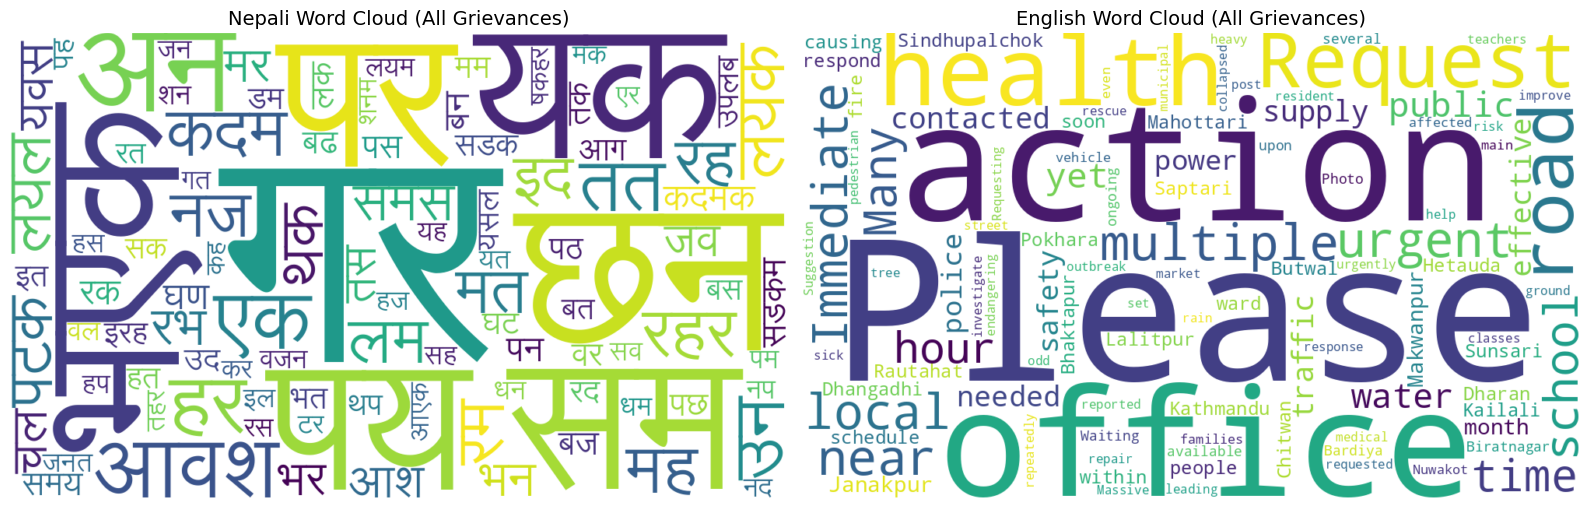

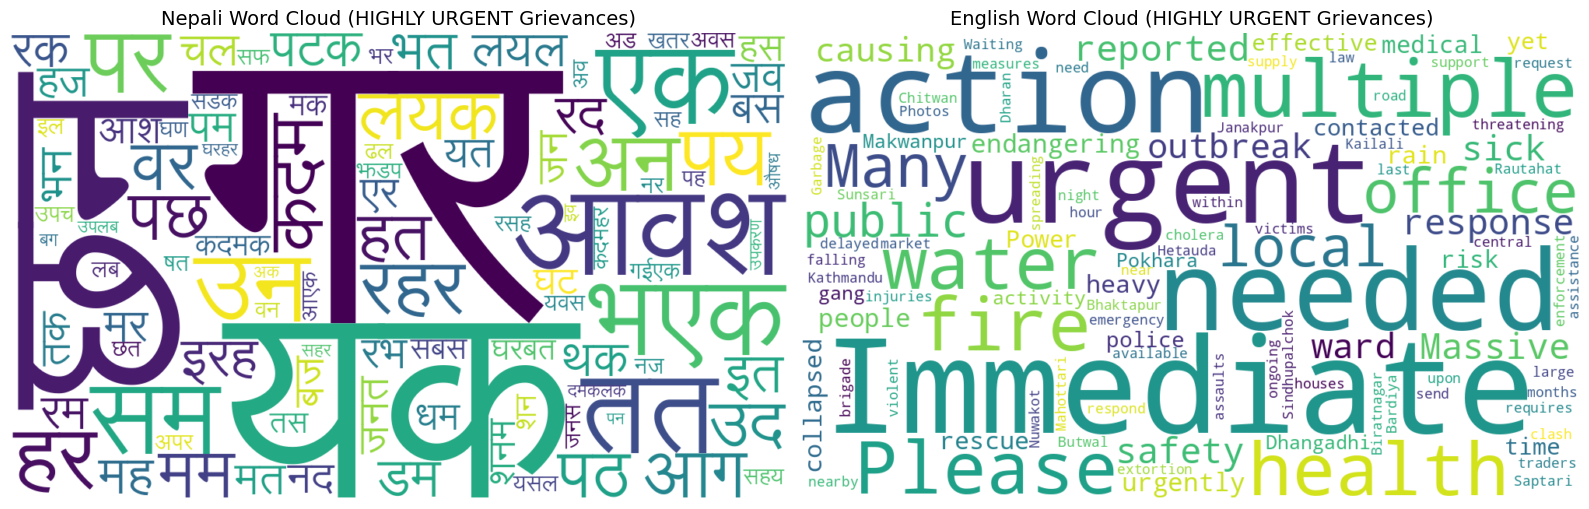

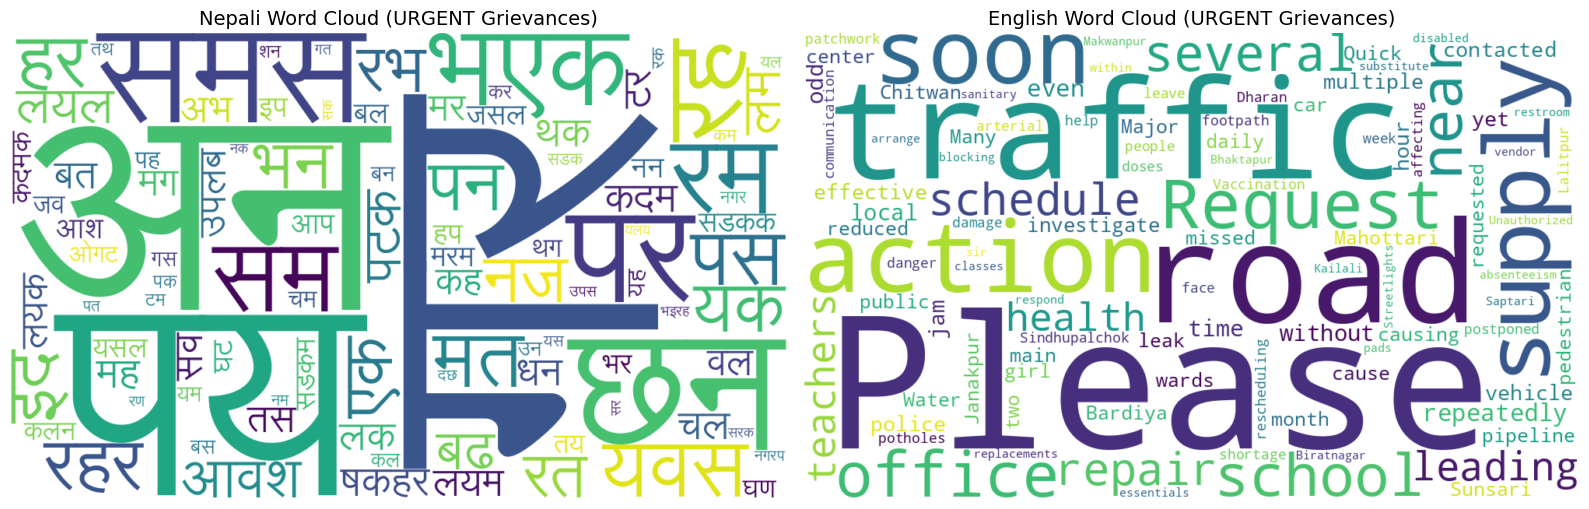

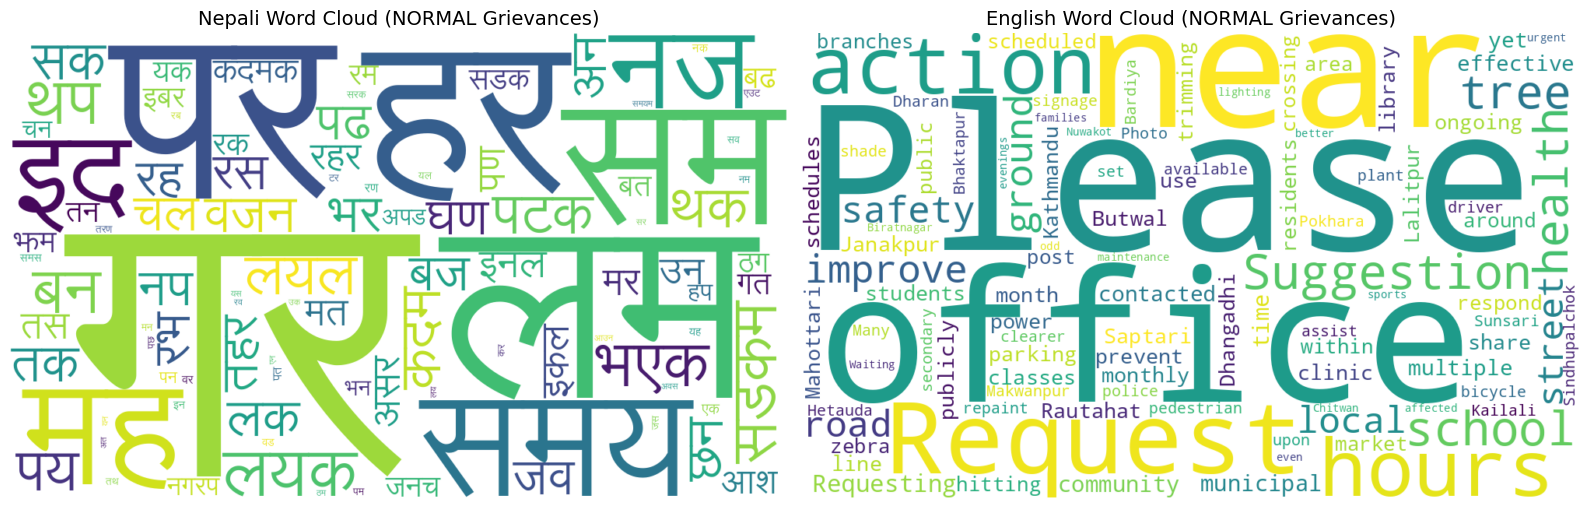

In [15]:
# ========== MAIN ==========
if __name__ == "__main__":
    csv_path = "../data/processed/sambodhan_balanced_dataset.csv"
    if os.path.exists(csv_path):
        run_eda_visualizations(csv_path)
    else:
        print(f"❌ CSV file not found at {csv_path}")

In [14]:
df = pd.read_csv("../data/processed/final-grievance-data_with_urgency-dept.csv")
df.head()   

,id,urgency,grievance,department
0,83222,HIGHLY URGENT,Subject: Enhancing Nepal’s Tourism Policies an...,Municipal Governance & Community Services
1,74259,URGENT,स्वास्थ्य बिमा लागू नहुदा उपचारमा कठिनाई परेको,"Education, Health & Social Welfare"
2,73063,URGENT,युवा तथा साना व्यावसायी स्वरोजगार कोषमा रिक्त ...,Municipal Governance & Community Services
3,71078,HIGHLY URGENT,उपरोक्त सम्बन्धमा हामी निवेदकहरु यस प्राधिकरण ...,"Infrastructure, Utilities & Natural Resources"
4,67993,HIGHLY URGENT,वन कार्यालयका हाकिम र सहायक हाकिम हरुले गैर नै...,"Infrastructure, Utilities & Natural Resources"


In [18]:
df["department"].value_counts()

department
Security & Law Enforcement                       1341
Municipal Governance & Community Services         179
Infrastructure, Utilities & Natural Resources      90
Education, Health & Social Welfare                 30
Name: count, dtype: int64

In [20]:
df["urgency"].unique()

array(['HIGHLY URGENT', 'URGENT', 'NORMAL'], dtype=object)

In [17]:
from sqlalchemy import create_engine, inspect
from dotenv import load_dotenv
import os

load_dotenv()
engine = create_engine(os.getenv("DATABASE_URL"))
inspector = inspect(engine)

for table_name in inspector.get_table_names():
    print(f"\nTable: {table_name}")
    for column in inspector.get_columns(table_name):
        print(f"  {column['name']} ({column['type']})")



In [ ]:
from sqlalchemy import (
    Column, Integer, String, Text, SmallInteger, ForeignKey,
    Boolean, DateTime, Enum, CheckConstraint
)
from sqlalchemy.orm import relationship, declarative_base
from datetime import datetime
from enum import IntEnum

Base = declarative_base()

# ---- ENUM-LIKE CLASSES ----
class Department(IntEnum):
    MUNICIPAL_GOVERNANCE = 0
    EDUCATION_HEALTH_WELFARE = 1
    INFRASTRUCTURE_UTILITIES = 2
    SECURITY_LAW_ENFORCEMENT = 3

class UrgencyLevel(IntEnum):
    NORMAL = 0
    URGENT = 1
    HIGHLY_URGENT = 2

class ComplaintStatus(IntEnum):
    PENDING = 0
    IN_PROGRESS = 1
    RESOLVED = 2
    CLOSED = 3


# ---- LOCATION TABLES ----
class District(Base):
    __tablename__ = "districts"
    id = Column(Integer, primary_key=True)
    name = Column(String(100), unique=True, nullable=False)
    created_at = Column(DateTime(timezone=True), default=datetime.utcnow)
    updated_at = Column(DateTime(timezone=True), default=datetime.utcnow)


class Municipality(Base):
    __tablename__ = "municipalities"
    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False)
    district_id = Column(Integer, ForeignKey("districts.id", ondelete="CASCADE"))
    created_at = Column(DateTime(timezone=True), default=datetime.utcnow)
    updated_at = Column(DateTime(timezone=True), default=datetime.utcnow)


class Ward(Base):
    __tablename__ = "wards"
    id = Column(Integer, primary_key=True)
    ward_number = Column(Integer, nullable=False)
    municipality_id = Column(Integer, ForeignKey("municipalities.id", ondelete="CASCADE"))
    created_at = Column(DateTime(timezone=True), default=datetime.utcnow)
    updated_at = Column(DateTime(timezone=True), default=datetime.utcnow)


# ---- USERS ----
class User(Base):
    __tablename__ = "users"
    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False)
    email = Column(String(120), unique=True, nullable=False)
    phone = Column(String(20))
    password_hash = Column(Text)
    role = Column(String(20), CheckConstraint("role IN ('citizen','official','mayor','super_admin')"), nullable=False)
    department = Column(SmallInteger, CheckConstraint("department BETWEEN 0 AND 3"))
    district_id = Column(Integer, ForeignKey("districts.id"))
    municipality_id = Column(Integer, ForeignKey("municipalities.id"))
    ward_id = Column(Integer, ForeignKey("wards.id"))
    created_at = Column(DateTime(timezone=True), default=datetime.utcnow)
    updated_at = Column(DateTime(timezone=True), default=datetime.utcnow)


# ---- COMPLAINTS ----
class Complaint(Base):
    __tablename__ = "complaints"
    id = Column(Integer, primary_key=True)
    citizen_id = Column(Integer, ForeignKey("users.id", ondelete="SET NULL"))
    department = Column(SmallInteger, CheckConstraint("department BETWEEN 0 AND 3"), nullable=False)
    message = Column(Text, nullable=False)
    message_processed = Column(Text)
    urgency = Column(SmallInteger, CheckConstraint("urgency BETWEEN 0 AND 2"), default=0)
    current_status = Column(SmallInteger, CheckConstraint("current_status BETWEEN 0 AND 3"), default=0)
    date_submitted = Column(DateTime(timezone=True), default=datetime.utcnow)
    district_id = Column(Integer, ForeignKey("districts.id"))
    municipality_id = Column(Integer, ForeignKey("municipalities.id"))
    ward_id = Column(Integer, ForeignKey("wards.id"))
    created_at = Column(DateTime(timezone=True), default=datetime.utcnow)
    updated_at = Column(DateTime(timezone=True), default=datetime.utcnow)


# ---- STATUS HISTORY ----
class ComplaintStatusHistory(Base):
    __tablename__ = "complaint_status_history"
    id = Column(Integer, primary_key=True)
    complaint_id = Column(Integer, ForeignKey("complaints.id", ondelete="CASCADE"))
    status = Column(SmallInteger, CheckConstraint("status BETWEEN 0 AND 3"), nullable=False)
    changed_by_user_id = Column(Integer, ForeignKey("users.id", ondelete="SET NULL"))
    changed_at = Column(DateTime(timezone=True), default=datetime.utcnow)
    comment = Column(Text)
    created_at = Column(DateTime(timezone=True), default=datetime.utcnow)


# ---- MISCLASSIFIED COMPLAINTS ----
class MisclassifiedComplaint(Base):
    __tablename__ = "misclassified_complaints"
    id = Column(Integer, primary_key=True)
    complaint_id = Column(Integer, ForeignKey("complaints.id", ondelete="CASCADE"))
    model_predicted_department = Column(SmallInteger, CheckConstraint("model_predicted_department BETWEEN 0 AND 3"))
    model_predicted_urgency = Column(SmallInteger, CheckConstraint("model_predicted_urgency BETWEEN 0 AND 2"))
    correct_department = Column(SmallInteger, CheckConstraint("correct_department BETWEEN 0 AND 3"))
    correct_urgency = Column(SmallInteger, CheckConstraint("correct_urgency BETWEEN 0 AND 2"))
    reported_by_user_id = Column(Integer, ForeignKey("users.id", ondelete="SET NULL"))
    reviewed = Column(Boolean, default=False)
    reviewed_at = Column(DateTime(timezone=True))
    created_at = Column(DateTime(timezone=True), default=datetime.utcnow)
